In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
caminho_dados = '/home/breno/Documentos/projeto_caique'
os.listdir(caminho_dados)

['dados.xlsx', '.~lock.dados.xlsx#']

In [3]:
dados = pd.read_excel(caminho_dados + '/dados.xlsx')

In [4]:
# vou criar um header pra ficar mais facil de ler cada uma das colunas:
header = [
    'Data Medicao',
    'Dir Vento',
    'Evapo Piche',
    'Evapotransp Potencial',
    'Evapotransp Real',
    'Insolacao Total',
    'Nebulosidade',
    'No de dias com prec pluv',
    'Prec Total',
    'Pressao',
    'T max',
    'T media',
    'T min',
    'UR',
    'Vento max',
    'Vento med',
    'Vis med',
    'NaN'
]

In [5]:
dados_tratado = dados[382:] # so a partir daqui eu tenho dado
dados_tratado.columns = header
dados_tratado = dados_tratado.set_index([dados_tratado['Data Medicao']])
dados_tratado.drop('Data Medicao', axis=1)
dados_tratado['Prec Total'] = pd.to_numeric(dados_tratado['Prec Total']) # teria que fazer isso com todos os que tao c erro....

,Dir Vento,Evapo Piche,Evapotransp Potencial,Evapotransp Real,Insolacao Total,Nebulosidade,No de dias com prec pluv,Prec Total,Pressao,T max,T media,T min,UR,Vento max,Vento med,Vis med,NaN
Data Medicao,,,,,,,,,,,,,,,,,
1961-01-31,5,NaN,NaN,NaN,NaN,7706522,17,154.1,1011083696,28919355,25990968,23.6,86032258,9,5358696,57419355,NaN
1961-02-28,5,NaN,NaN,NaN,NaN,3595238,9,21.1,1012535714,29.6,26.31,22842857,80616071,9,397619,60,NaN
1961-03-31,5,NaN,NaN,NaN,NaN,4494624,13,63.9,1013006452,29206452,25983871,22890323,81516129,7,3537634,58387097,NaN
1961-04-30,5,NaN,NaN,NaN,NaN,5433333,13,112.3,1013811111,28413333,25302667,21856667,84.3,9,2688889,57.5,NaN
1961-05-31,5,NaN,NaN,NaN,NaN,511828,15,136.2,1016191398,26722581,2366129,20270968,82306452,7,2494624,57741935,NaN
1961-06-30,9,NaN,NaN,NaN,NaN,4588889,15,114.3,1018911111,25653333,22734,19756667,83341667,9,2877778,58.5,NaN
1961-07-31,9,NaN,NaN,NaN,NaN,5655914,17,104,1019534409,24622581,21470323,17490323,79629032,9,2129032,57419355,NaN
1961-08-31,5,NaN,NaN,NaN,NaN,316129,3,6.3,1019322581,25480645,22213548,17.6,75637097,7,3010753,5983871,NaN
1961-09-30,5,NaN,NaN,NaN,NaN,3266667,5,4,1015693333,26.79,23946,20203333,75941667,9,5133333,58666667,NaN


# Agora parece ja estar tratadinho

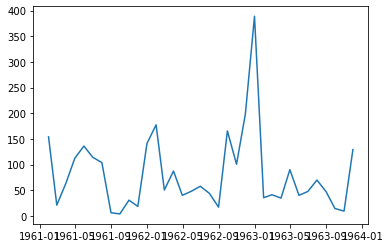

In [20]:
plt.plot(dados_tratado['Prec Total'])

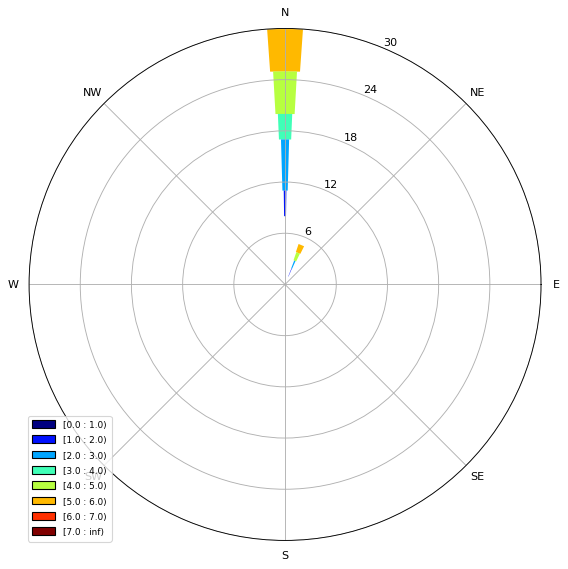

In [43]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Create wind speed and direction variables

ws = np.random.random(35) * 6
wd = dados_tratado['Dir Vento']

ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])
#ax.set_theta_zero_location('N')

ax.box(wd, ws, bins=np.arange(0, 8, 1))
ax.set_legend()

# Nova tentativa

In [45]:
novo_caminho = caminho_dados + '/novo/novo1' 

In [54]:
pd.read_csv(novo_caminho + '/1930.csv',sep=';',decimal=',')

,Data Medicao\tDIRECAO PREDOMINANTE DO VENTO,MENSAL(° (gr))\tEVAPORACAO DO PICHE,MENSAL(mm)\tEVAPOTRANSPIRACAO POTENCIAL,BH MENSAL(mm)\tEVAPOTRANSPIRACAO REAL,BH MENSAL(mm)\tINSOLACAO TOTAL,MENSAL(h)\tNEBULOSIDADE,MEDIA MENSAL(décimos)\tNUMERO DE DIAS COM PRECIP. PLUV,MENSAL(número)\tPRECIPITACAO TOTAL,MENSAL(mm)\tPRESSAO ATMOSFERICA,MEDIA MENSAL(mB)\tTEMPERATURA MAXIMA MEDIA,MENSAL(°C)\tTEMPERATURA MEDIA COMPENSADA,MENSAL(°C)\tTEMPERATURA MINIMA MEDIA,MENSAL(°C)\tUMIDADE RELATIVA DO AR,MEDIA MENSAL(%)\tVENTO,VELOCIDADE MAXIMA MENSAL(m/s)\tVENTO,VELOCIDADE MEDIA MENSAL(m/s)\tVISIBILIDADE,MEDIA MENSAL(codigo)\t
0,1930-01-31\tnull\tnull\tnull\tnull\tnull\tnull...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1930-02-28\tnull\tnull\tnull\tnull\tnull\tnull...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1930-03-31\tnull\tnull\tnull\tnull\tnull\tnull...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1930-04-30\tnull\tnull\tnull\tnull\tnull\tnull...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1930-05-31\tnull\tnull\tnull\tnull\tnull\tnull...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1963-07-31\t5\t67,3\tnull\tnull\tnull\t4,215054\t10\t69,9\t1019,246237\t24,158065\t21,055484\t17,316129\t81,491935\t7\t3\t57,419355\tnull,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,1963-08-31\t5\t84,5\tnull\tnull\tnull\t3,860215\t6\t47,3\t1018,03871\t24,609677\t21,544516\t17,429032\t78,459677\t7\t3,365591\t58,709677\tnull,NaN,NaN,NaN,NaN,NaN,NaN
404,1963-09-30\t5\t96\tnull\tnull\tnull\t4,488889\t7\t14,5\t1016,997778\t25,716667\t23,058\t19,793333\t78,175\t9\t3,944444\t55\tnull,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,1963-10-31\t5\t102,2\tnull\tnull\tnull\t4,817204\t2\t9,5\t1014,775269\t27,180645\t24,663226\t21,935484\t78,943548\t9\t4,774194\t53,064516\tnull,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
dados30 = pd.read_csv(novo_caminho + '/1930.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 11, saw 17


# Tentativa Breno

In [60]:
novo_caminho1 = novo_caminho[:-1:] + '2'
novo_caminho1

'/home/breno/Documentos/projeto_caique/novo/novo2'

In [77]:
breno_caminho = '/home/breno/Documentos/projeto_caique/breno/aa'
breno_caminho

'/home/breno/Documentos/projeto_caique/breno/aa'

In [89]:
# precisei ajeitar no arquivo, tava com um nome estranho no titulo das colunas

# precisei deletar no arquivo tb a parte que ele diz qual a estacao etc

dados06 = pd.read_csv(breno_caminho + '/1969.csv', sep=',')
dados06[9:520]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
9,Data Medicao,DIRECAO PREDOMINANTE DO VENTO MENSAL(° (gr)),PRECIPITACAO TOTAL MENSAL(mm),PRESSAO ATMOSFERICA MEDIA MENSAL(mB),TEMPERATURA MEDIA COMPENSADA MENSAL(°C),VENTO VELOCIDADE MEDIA MENSAL(m/s),NaN,NaN,NaN,NaN,NaN
10,1969-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1969-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1969-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1969-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
515,2011-07-31,NaN,120.7,1014.770423,21.707097,NaN,NaN,NaN,NaN,NaN,NaN
516,2011-08-31,NaN,18.8,1013.903226,22.38129,NaN,NaN,NaN,NaN,NaN,NaN
517,2011-09-30,NaN,33.8,1015.278889,21.916667,NaN,NaN,NaN,NaN,NaN,NaN
518,2011-10-31,NaN,213.3,1010.284946,23.711613,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
header = [
    'Data Medicao',
    'Dir Vento',
    'Prec Total',
    'Pressao',
    'Temp',
    'Vel Vento',
    '-','-','-','-','-'
]

In [117]:
dados_tratado = dados06[10:] # so a partir daqui eu tenho dado -> ir no chutometro
dados_tratado.columns = header
dados_tratado = dados_tratado.set_index([dados_tratado['Data Medicao']])
dados_tratado = dados_tratado.drop('Data Medicao', axis=1)
del dados_tratado ['-'] 
dados_tratado
# dados_tratado['Prec Total'] = pd.to_numeric(dados_tratado['Prec Total']) # teria que fazer isso com todos os que tao c erro....

,Dir Vento,Prec Total,Pressao,Temp,Vel Vento
Data Medicao,,,,,
1969-06-30,NaN,NaN,NaN,NaN,NaN
1969-07-31,NaN,NaN,NaN,NaN,NaN
1969-08-31,NaN,NaN,NaN,NaN,NaN
1969-09-30,NaN,NaN,NaN,NaN,NaN
1969-10-31,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-03-31,NaN,79.1,1010.445161,NaN,NaN
2021-04-30,NaN,49.2,1011.47931,NaN,NaN
2021-05-31,NaN,33.5,1013.71,NaN,NaN


In [131]:
dados_dir = dados_tratado[dados_tratado['Dir Vento'].notna()] # dataframe sem nenhum direcao de vento como NaN
dados_vel = dados_dir[dados_dir['Vel Vento'].notna()] # dataframe sem nenhuma dir nem vel como NaN

In [132]:
# python interpretou esses carinhas como string, vamos passa-los para numeros!

dados_vel['Vel Vento'] = pd.to_numeric(dados_vel['Vel Vento'])
dados_vel['Dir Vento'] = pd.to_numeric(dados_vel['Dir Vento'])

In [135]:
dados_vel

,Dir Vento,Prec Total,Pressao,Temp,Vel Vento
Data Medicao,,,,,
1970-11-30,5,231.1,989.619118,NaN,3.308824
1970-12-31,5,32.5,992.802151,NaN,4.247312
1971-01-31,5,29.6,993.835484,25.733548,3.559140
1971-02-28,5,21.1,993.265476,26.469286,3.788095
1971-03-31,5,81.6,993.64557,25.816923,2.948718
...,...,...,...,...,...
1999-04-30,18,69.9,1013.530435,NaN,1.966667
1999-06-30,0,19.4,1015.373333,NaN,1.400000
1999-07-31,0,264.9,1017.136957,22.134839,1.630435


In [206]:
# fazer logica de somar 180 e chegar no norte, o problema vai ser pra inverter de horario p antihorario...
# 30 em horario equivale a 360 - 30 em AH
# o limite do meu carinha eh de 0 a 365
# 0 = L , 90 = N, 180 = W, 270 = S
# quero fazer com que 0 = W; 90 = N; 180=L;270 = E

# ESSA FUNCAO SO PASSA O 0 PRO LESTE E FAZ A ROSA RODAR NO SENTIDO AH

def vento_inverso(dire):
    if dire<=180:
        dire = 180 - dire
    else:
        dire = 360 - (dire-180)
    return dire
    
    

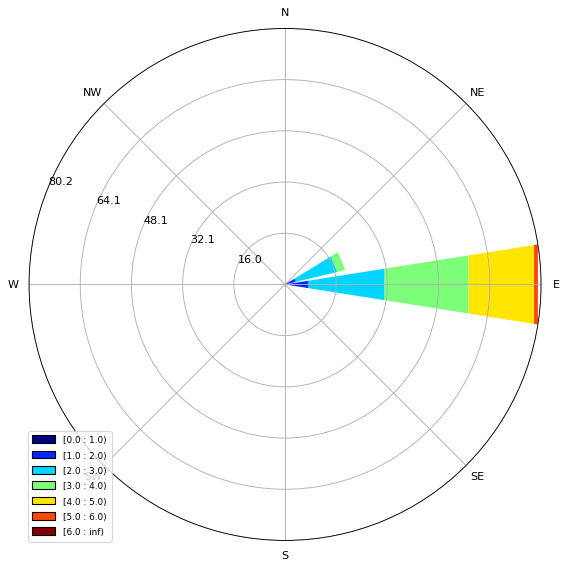

In [212]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Create wind speed and direction variables

ws = dados_vel['Vel Vento']
wd = dados_vel['Dir Vento']
wd = [vento_inverso(i) for i in wd] # fazendo operacao matematica pra deixar o vento no lugar "certo"
# wd = [i*(-1) for i in wd] 

ax = WindroseAxes.from_ax()

ax.set_xticklabels(['N', 'NW',  'W', 'SW', 'S', 'SE','E', 'NE'])#se meter essa, o 0 fica sendo leste->gira horario
ax.set_theta_zero_location('N')


#ws = [1,1]
#wd = [90,90] # 0 eh norte; ele gira no sentido horario -> 90 eh leste

ax.bar(wd, ws, bins=np.arange(0, 6.3, 1), normed = True) # tava usando ax.box, mas da no msm
ax.set_legend()